In [2]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
# import dataset

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# check for missing values

df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# type of variables

df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Descriptive analysis

In [6]:
df.shape

(70692, 22)

In [7]:

df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,29.856985,2.837082,3.752037,5.810417,8.584055,4.920953,5.698311
std,7.113954,1.113565,8.155627,10.062261,2.852153,1.029081,2.175196
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,25.000000,2.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,29.000000,3.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,33.000000,4.000000,2.000000,6.000000,11.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


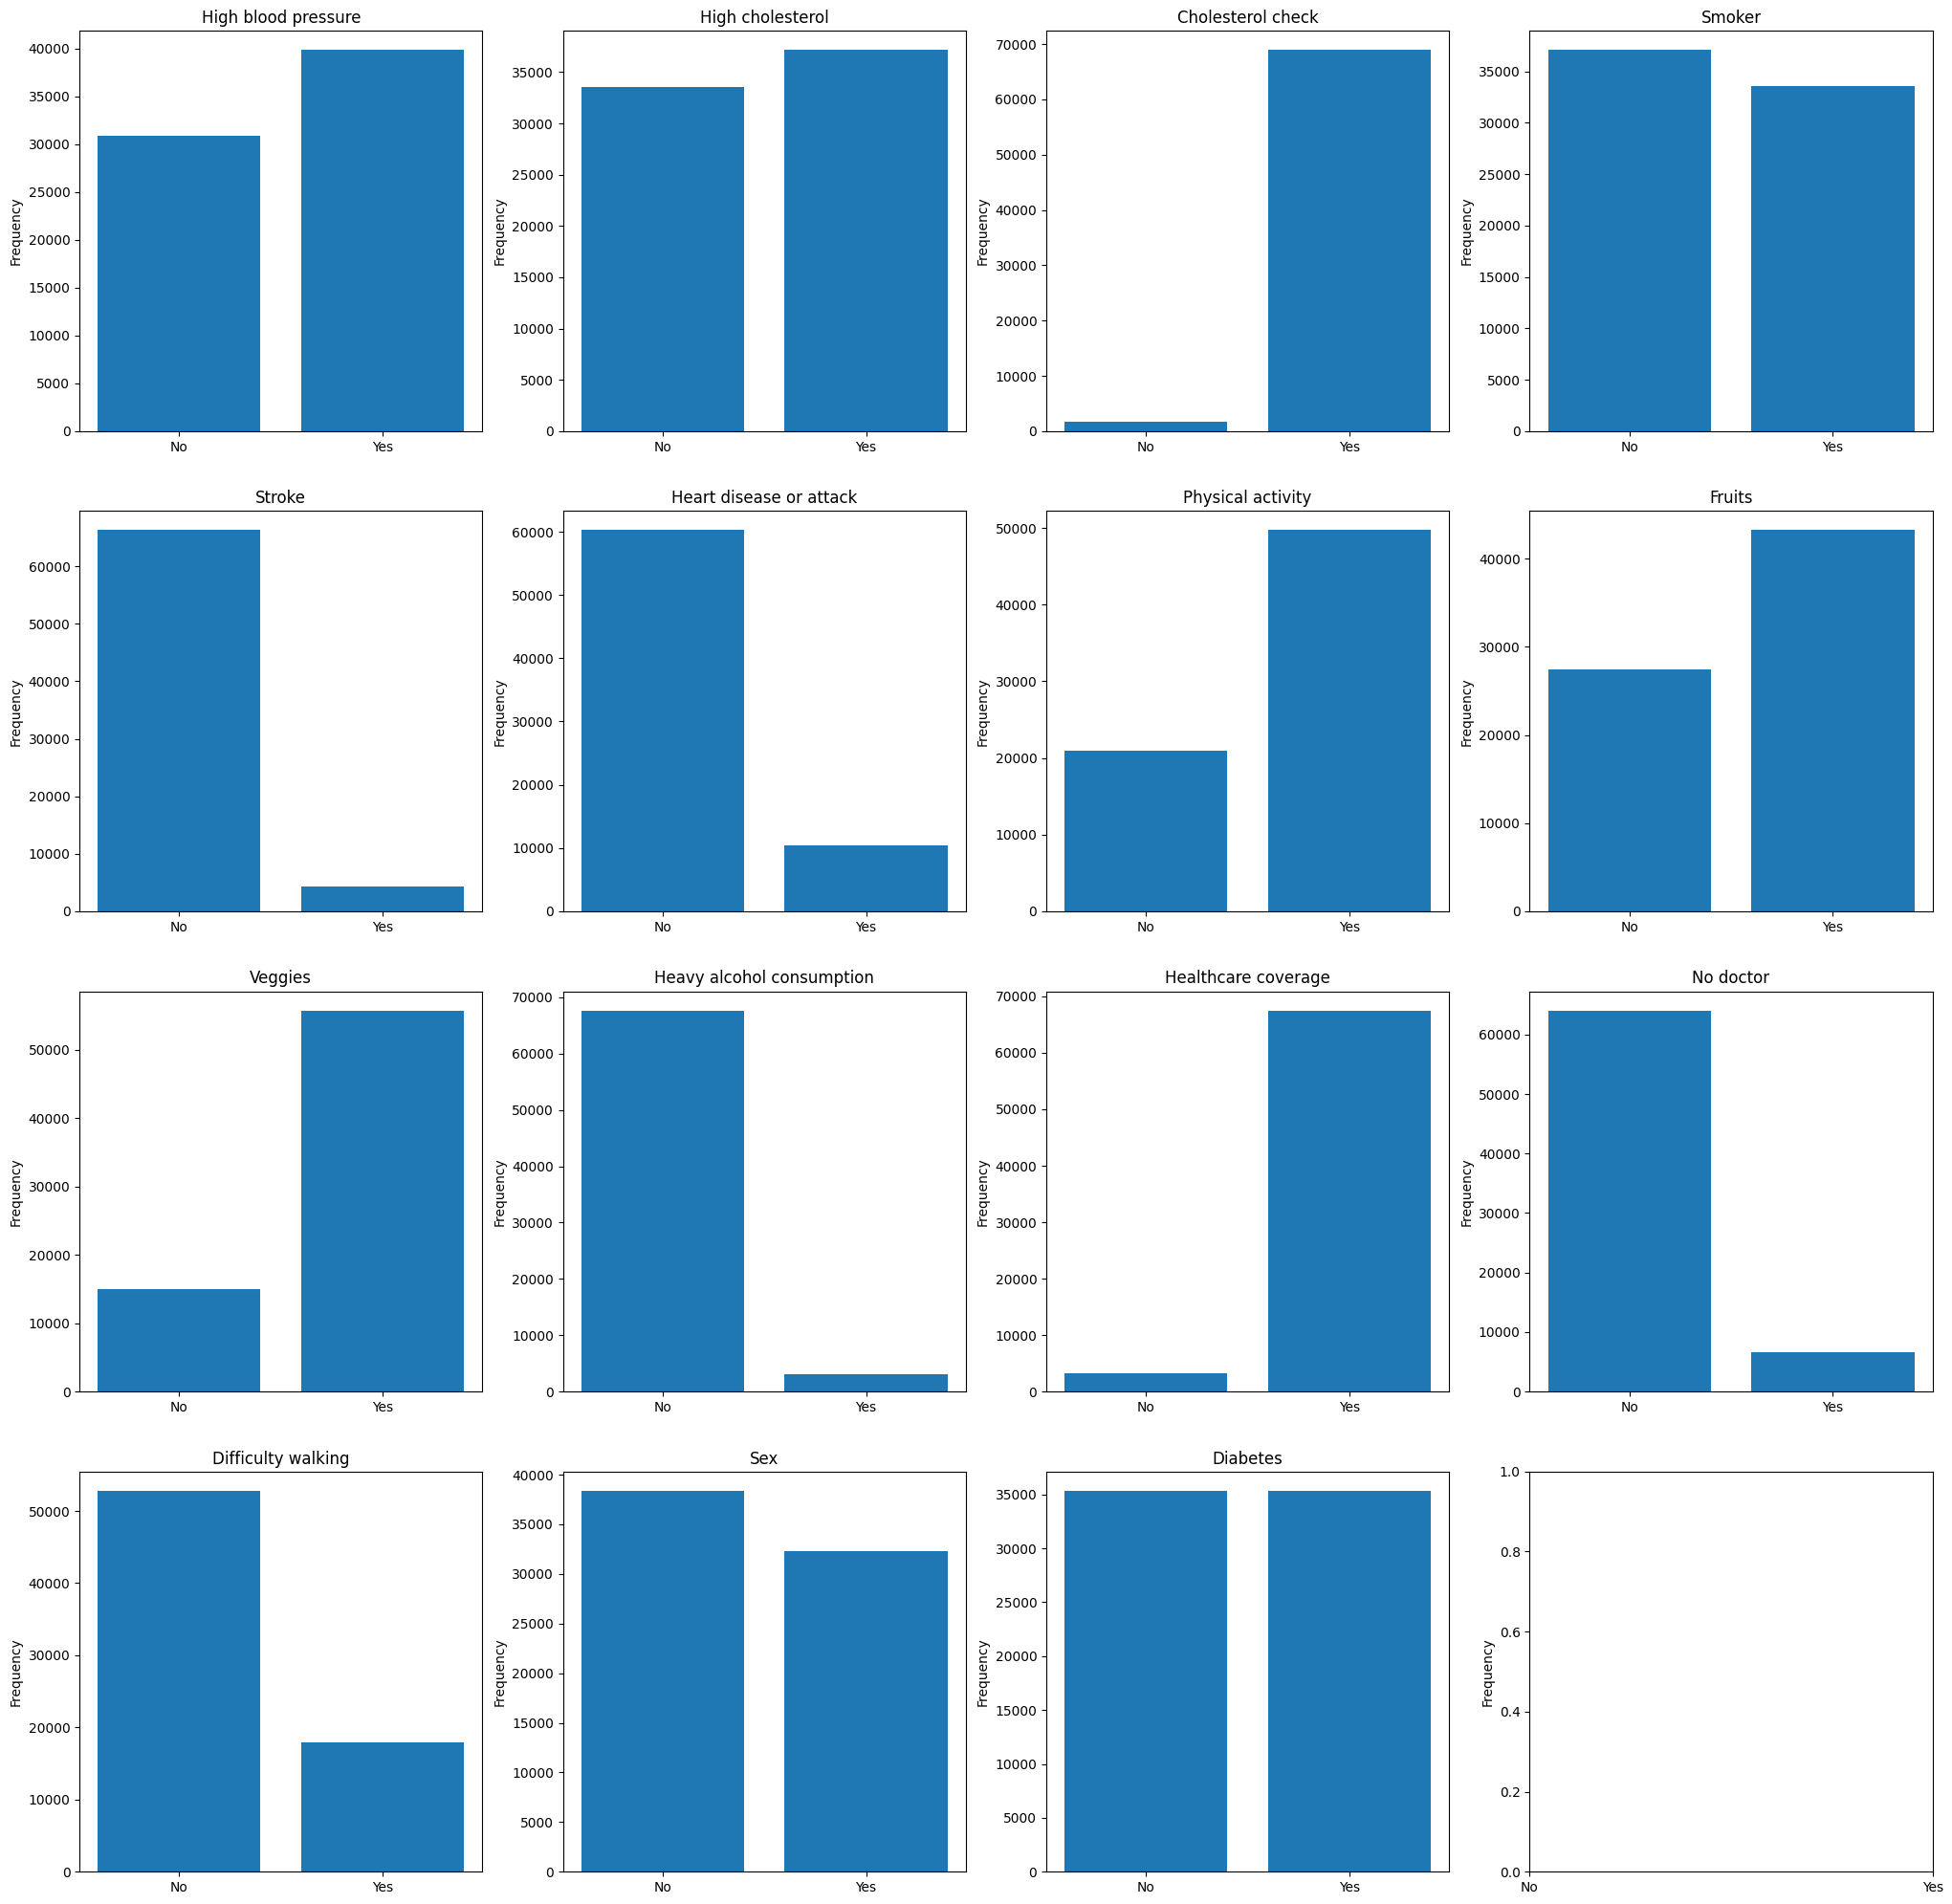

In [8]:
# Frequency of binary variables

fig, axs = plt.subplots(4, 4, figsize=(25, 25))

axs[0, 0].bar(df['HighBP'].value_counts().index, df['HighBP'].value_counts().values)
axs[0, 0].set_title('High blood pressure')

axs[0, 1].bar(df['HighChol'].value_counts().index, df['HighChol'].value_counts().values)
axs[0, 1].set_title('High cholesterol')

axs[0, 2].bar(df['CholCheck'].value_counts().index, df['CholCheck'].value_counts().values)
axs[0, 2].set_title('Cholesterol check')

axs[0, 3].bar(df['Smoker'].value_counts().index, df['Smoker'].value_counts().values)
axs[0, 3].set_title('Smoker')

axs[1, 0].bar(df['Stroke'].value_counts().index, df['Stroke'].value_counts().values)
axs[1, 0].set_title('Stroke')

axs[1, 1].bar(df['HeartDiseaseorAttack'].value_counts().index, df['HeartDiseaseorAttack'].value_counts().values)
axs[1, 1].set_title('Heart disease or attack')

axs[1, 2].bar(df['PhysActivity'].value_counts().index, df['PhysActivity'].value_counts().values)
axs[1, 2].set_title('Physical activity')

axs[1, 3].bar(df['Fruits'].value_counts().index, df['Fruits'].value_counts().values)
axs[1, 3].set_title('Fruits')

axs[2, 0].bar(df['Veggies'].value_counts().index, df['Veggies'].value_counts().values)
axs[2, 0].set_title('Veggies')

axs[2, 1].bar(df['HvyAlcoholConsump'].value_counts().index, df['HvyAlcoholConsump'].value_counts().values)
axs[2, 1].set_title('Heavy alcohol consumption')

axs[2, 2].bar(df['AnyHealthcare'].value_counts().index, df['AnyHealthcare'].value_counts().values)
axs[2, 2].set_title('Healthcare coverage')

axs[2, 3].bar(df['NoDocbcCost'].value_counts().index, df['NoDocbcCost'].value_counts().values)
axs[2, 3].set_title('No doctor')

axs[3, 0].bar(df['DiffWalk'].value_counts().index, df['DiffWalk'].value_counts().values)
axs[3, 0].set_title('Difficulty walking')

axs[3, 1].bar(df['Sex'].value_counts().index, df['Sex'].value_counts().values)
axs[3, 1].set_title('Sex')

axs[3, 2].bar(df['Diabetes_binary'].value_counts().index, df['Diabetes_binary'].value_counts().values)
axs[3, 2].set_title('Diabetes')


for ax in axs.flat:
    ax.set(ylabel='Frequency')
    ax.set_xticks(ticks=[0, 1], labels=['No', 'Yes'])



Text(0.5, 1.0, 'Education')

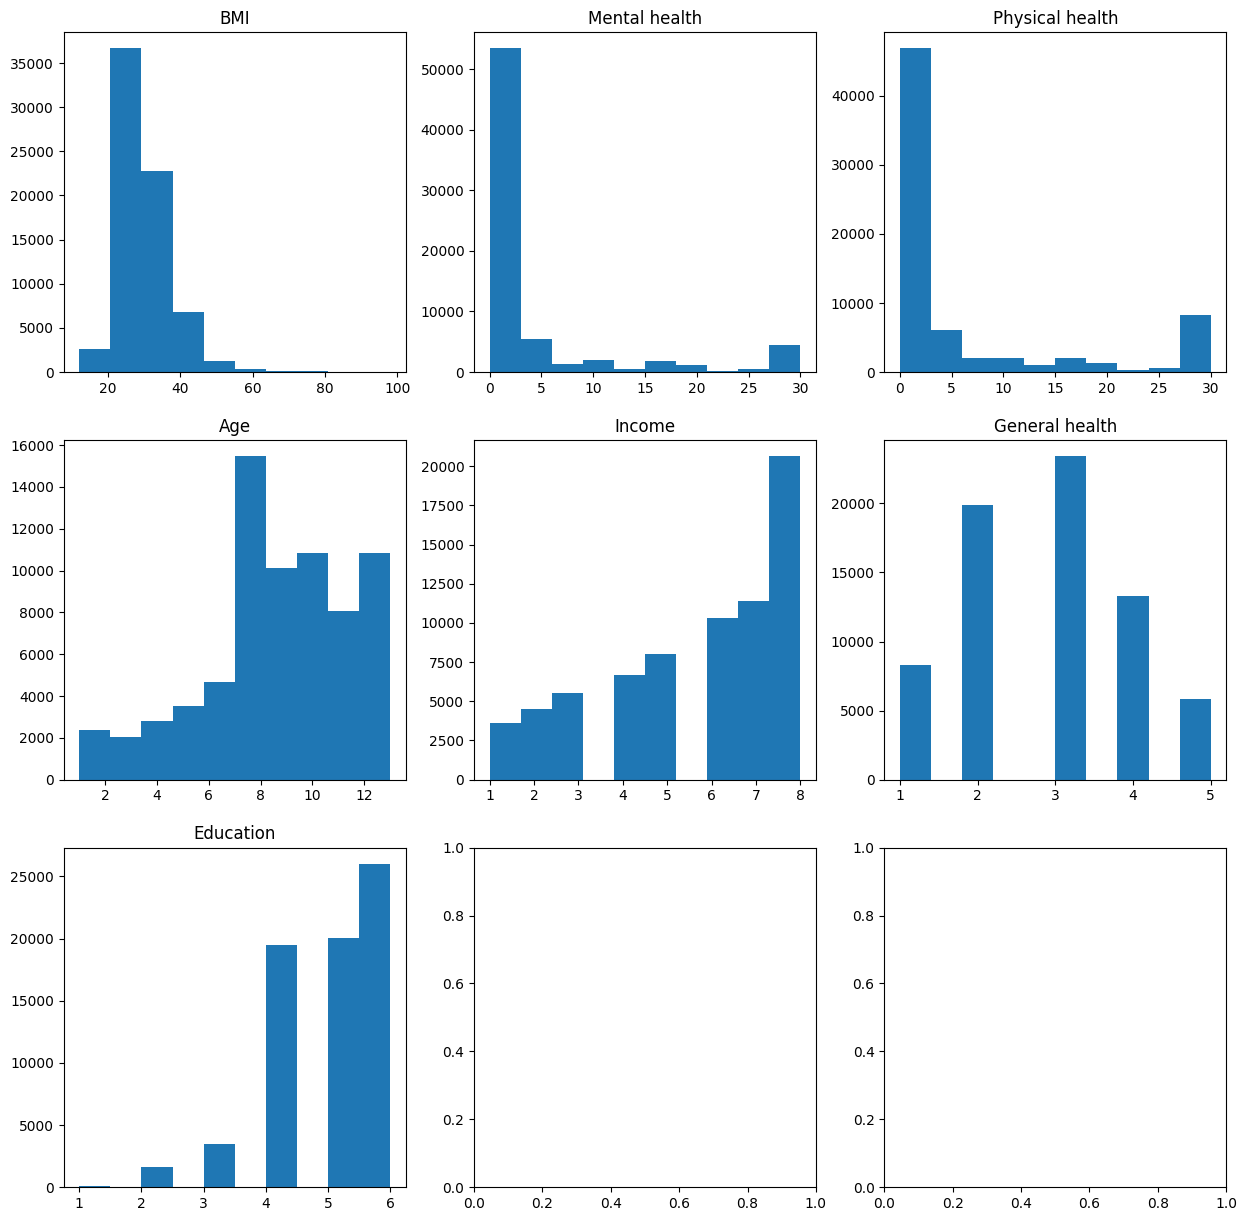

In [9]:
# Histogram of continuous variables

fig, axs = plt.subplots(3,3, figsize=(15, 15))

axs[0,0].hist(df['BMI'])
axs[0,0].set_title('BMI')

axs[0,1].hist(df['MentHlth'])
axs[0,1].set_title('Mental health')

axs[0,2].hist(df['PhysHlth'])
axs[0,2].set_title('Physical health')

axs[1,0].hist(df['Age'])
axs[1,0].set_title('Age')

axs[1,1].hist(df['Income'])
axs[1,1].set_title('Income')

axs[1,2].hist(df['GenHlth'])
axs[1,2].set_title('General health')

axs[2,0].hist(df['Education'])
axs[2,0].set_title('Education')





Random Forest Model

In [10]:
# define features 

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# evaluation of the model

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7371101209420751

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [13]:
# save model

joblib.dump(model, 'diabetes_predictor.pkl')

['diabetes_predictor.pkl']